In [1]:
//%jsroot on

In [2]:
TCanvas *c1=new TCanvas;

In [3]:
Double_t runtime_low[810],runtime_high[810];
Int_t therunnumber;
Double_t aaa,lowhour,lowsecond,highhour,highsecond,theday;
ifstream inday("/home/zhuhy/JNBook/Experiment2022/taf/check/txt/15C_all_time_run.txt");
  if(inday.is_open()){
    while(!inday.eof())
    {
      inday>>theday>>therunnumber>>lowhour>>lowsecond>>highhour>>highsecond;
      theday=theday-20221100;
      //cout<<theday<<'\t'<<therunnumber<<'\t'<<lowhour<<'\t'<<lowsecond<<'\t'<<highhour<<'\t'<<lowsecond<<'\n';
      runtime_low[therunnumber] =theday*24+lowhour+lowsecond/60;
      runtime_high[therunnumber]=theday*24+highhour+highsecond/60;
      if(lowhour>highhour)runtime_high[therunnumber]+=24;
      //cout<<"runnumber="<<therunnumber<<'\t'<<"lowtime="<<runtime_low[therunnumber]<<'\t'<<"hightime="<<runtime_high[therunnumber]<<'\t'<<runtime_high[therunnumber]-runtime_low[therunnumber]<<'\n';
      if(therunnumber==809)break;
    }
  }
  inday.close();

In [4]:
  TGraph *gaccpttedrate=new TGraph();
Double_t accpttedrate[810],hhh,temprate;
Int_t countrate=0;
ifstream inr("/home/zhuhy/JNBook/Experiment2022/taf/check/txt/trigger_accepted_rate.txt");
  if(inr.is_open()){
    while(!inr.eof())
    {
      inr>>therunnumber>>hhh>>hhh>>hhh>>hhh>>temprate;
      accpttedrate[therunnumber]=temprate;
      gaccpttedrate->SetPoint(countrate++,therunnumber,accpttedrate[therunnumber]);
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inr.close();

In [5]:
  TGraph *gCrate=new TGraph();
  TGraph *gtarrate=new TGraph();
  Double_t Crate[810],tarrate[810],tempCrate,temptarrate;
  Int_t countrateC=0,countratetar=0;
ifstream inr1("/home/zhuhy/JNBook/Experiment2022/taf/check/txt/15C_all_Crate_tarrate.txt");
  if(inr1.is_open()){
    while(!inr1.eof())
    {
      inr1>>therunnumber>>tempCrate>>temptarrate;
      Crate[therunnumber]=tempCrate;
      tarrate[therunnumber]=temptarrate;
      gCrate->SetPoint(countrateC++,therunnumber,Crate[therunnumber]);
      gtarrate->SetPoint(countratetar++,therunnumber,tarrate[therunnumber]);
      //cout<<therunnumber<<'\t'<<rate[therunnumber]<<'\n';
    }
  }
  inr1.close();

In [6]:
  Double_t C15CH2fenchu1=3;
  Double_t key=0;
  Int_t nowfenchu;
  int i;
  TGraph *gt0M=new TGraph();
  TGraph *gt0MB=new TGraph();
  TGraph *gt0S=new TGraph();
  TGraph *gxtaf=new TGraph();
  TGraph *gvtaf=new TGraph();
  TGraph *gt1d1=new TGraph();
  Double_t th;
  Double_t a3,a2,tmp1,tmp2,tmp3,tmp4,tmp5,ttime;
  Double_t t0dMall[810],t0MBall[810],t0sall[810],t0dM,t0MB,t0s;
  Double_t xtafall[810],vtafall[810],t1d1all[810];
  Double_t t0d1M,t0d2M,taf2,taf3,taf4,taf5,vtaf,t1d1,xtaf,t1andt2;
  Double_t t0realall[810];
  for(Int_t ii=0;ii<810;ii++){
      t0dMall[ii]=0;
      t0MBall[ii]=0;
      t0sall[ii]=0;
      t0realall[ii]=0;
  }

  TString fileName;
Int_t thecount=0;
therunnumber=0;
for(Int_t iii=0;iii<=5;iii++){
  fileName = TString::Format("/data/d1/share/pwl/scaler-data/202211%02d.txt",iii+2);
  ifstream in(fileName.Data());
  if(in.is_open()){
    while(!in.eof())
    {
      in>>ttime>>tmp2>>tmp3>>tmp4>>t0s>>t0dM>>t0d1M>>t0d2M>>tmp4>>taf2
        >>taf3>>taf4>>taf5>>vtaf>>tmp5>>tmp1>>t0MB>>t1d1>>xtaf>>tmp5
        >>tmp1>>t1andt2>>tmp3>>tmp4>>tmp5>>tmp1>>a3>>tmp3>>tmp4>>tmp5
        >>tmp1>>tmp2>>tmp3;
        th=ttime/3600.+24.*(iii+2);
        for(Int_t ii=0;ii<141;ii++)if(th>runtime_low[420+ii]&&th<runtime_high[420+ii])therunnumber=420+ii;
        if(th>runtime_high[560])therunnumber=0;
        if(therunnumber==420)nowfenchu=500;
        else if(therunnumber==421)nowfenchu=10;
        else if(therunnumber==422||therunnumber==423)nowfenchu=5;
        else if(therunnumber==424||therunnumber==425)nowfenchu=1;
        else if(therunnumber==426)nowfenchu=5;
        else if(therunnumber==427)nowfenchu=2;
        else if(therunnumber>=428&&therunnumber<=453)nowfenchu=3;
        else if(therunnumber==454)nowfenchu=10;
        else if(therunnumber>=455&&therunnumber<=457)nowfenchu=12;
        else if(therunnumber>=458)nowfenchu=15;
        thecount++;
        
        t0dMall[therunnumber]+=t0dM;
        t0MBall[therunnumber]+=t0MB;
        if(t0s*nowfenchu<100000)t0sall[therunnumber]+=t0s*nowfenchu;
        xtafall[therunnumber]+=xtaf;
        vtafall[therunnumber]+=vtaf;
        t1d1all[therunnumber]+=t1d1;
        if(thecount%1000==0)cout<<"t="<<th<<'\t'<<"runnumber="<<therunnumber<<'\t'<<"t0Sall="<<t0sall[therunnumber]<<'\t'<<"t0S="<<t0s*nowfenchu<<'\n';
    }
  }
  in.close();
}

therunnumber=0;
thecount=0;
for(Int_t iii=0;iii<=1;iii++){
  fileName = TString::Format("/data/d1/share/pwl/scaler-data/202211%02d.txt",iii+16);
  ifstream in(fileName.Data());
  if(in.is_open()){
    while(!in.eof())
    {
      in>>ttime>>tmp2>>tmp3>>tmp4>>t0s>>t0dM>>t0d1M>>t0d2M>>tmp4>>taf2
        >>taf3>>taf4>>taf5>>vtaf>>tmp5>>tmp1>>t0MB>>t1d1>>xtaf>>tmp5
        >>tmp1>>t1andt2>>tmp3>>tmp4>>tmp5>>tmp1>>a3>>tmp3>>tmp4>>tmp5
        >>tmp1>>tmp2>>tmp3;
        th=ttime/3600.+24.*(iii+16);
        for(Int_t ii=0;ii<20;ii++)if(th>runtime_low[790+ii]&&th<runtime_high[790+ii])therunnumber=790+ii;
        nowfenchu=100;
        thecount++;
        t0dMall[therunnumber]+=t0dM;
        t0MBall[therunnumber]+=t0MB;
        t0sall[therunnumber]+=t0s*nowfenchu;
        xtafall[therunnumber]+=xtaf;
        vtafall[therunnumber]+=vtaf;
        t1d1all[therunnumber]+=t1d1;
        //if(therunnumber>=799&&therunnumber<=801&thecount%10==0)cout<<"t="<<th<<'\t'<<"runnumber="<<therunnumber<<'\t'<<"t0Sall="<<t0sall[therunnumber]<<'\t'<<"t0S="<<t0s*nowfenchu<<'\n';
    }
  }
  in.close();
}

t=48.2775	runnumber=0	t0Sall=0	t0S=0
t=48.5553	runnumber=0	t0Sall=0	t0S=0
t=48.8331	runnumber=0	t0Sall=0	t0S=0
t=49.1108	runnumber=0	t0Sall=0	t0S=0
t=49.3886	runnumber=0	t0Sall=0	t0S=0
t=49.6664	runnumber=0	t0Sall=0	t0S=0
t=49.9442	runnumber=0	t0Sall=0	t0S=0
t=50.2219	runnumber=0	t0Sall=0	t0S=0
t=50.4997	runnumber=0	t0Sall=0	t0S=0
t=50.7775	runnumber=0	t0Sall=0	t0S=0
t=51.0553	runnumber=0	t0Sall=0	t0S=0
t=51.3331	runnumber=0	t0Sall=0	t0S=0
t=51.6108	runnumber=0	t0Sall=0	t0S=0
t=51.8886	runnumber=0	t0Sall=0	t0S=0
t=52.1664	runnumber=0	t0Sall=0	t0S=0
t=52.4442	runnumber=0	t0Sall=0	t0S=0
t=52.7219	runnumber=0	t0Sall=0	t0S=0
t=52.9997	runnumber=0	t0Sall=0	t0S=0
t=53.2775	runnumber=0	t0Sall=0	t0S=0
t=53.5553	runnumber=0	t0Sall=0	t0S=0
t=53.8331	runnumber=0	t0Sall=0	t0S=0
t=54.1108	runnumber=0	t0Sall=0	t0S=0
t=54.3886	runnumber=0	t0Sall=0	t0S=0
t=54.6664	runnumber=0	t0Sall=0	t0S=0
t=54.9442	runnumber=0	t0Sall=0	t0S=0
t=55.2219	runnumber=0	t0Sall=0	t0S=0
t=55.4997	runnumber=0	t0Sall=0	t0S=0
t

t=97.7214	runnumber=468	t0Sall=3.70777e+07	t0S=27405
t=97.9992	runnumber=468	t0Sall=6.47368e+07	t0S=26805
t=98.2769	runnumber=468	t0Sall=9.15828e+07	t0S=27420
t=98.5547	runnumber=469	t0Sall=2.4714e+07	t0S=27720
t=98.8325	runnumber=469	t0Sall=5.18921e+07	t0S=27090
t=99.1103	runnumber=469	t0Sall=7.9557e+07	t0S=27855
t=99.3881	runnumber=470	t0Sall=2.39772e+07	t0S=27975
t=99.6658	runnumber=470	t0Sall=5.10751e+07	t0S=26970
t=99.9436	runnumber=470	t0Sall=7.56525e+07	t0S=23265
t=100.221	runnumber=471	t0Sall=1.17301e+07	t0S=0
t=100.499	runnumber=471	t0Sall=1.17646e+07	t0S=0
t=100.777	runnumber=471	t0Sall=1.17646e+07	t0S=0
t=101.055	runnumber=471	t0Sall=1.17646e+07	t0S=0
t=101.332	runnumber=472	t0Sall=2.74463e+07	t0S=27795
t=101.61	runnumber=472	t0Sall=5.37054e+07	t0S=26055
t=101.888	runnumber=472	t0Sall=7.80935e+07	t0S=26805
t=102.166	runnumber=473	t0Sall=2.34816e+07	t0S=24720
t=102.444	runnumber=473	t0Sall=4.82197e+07	t0S=25155
t=102.721	runnumber=473	t0Sall=7.27029e+07	t0S=26940
t=102.999	ru

t=142.166	runnumber=517	t0Sall=8.54205e+07	t0S=32535
t=142.443	runnumber=517	t0Sall=1.16608e+08	t0S=29955
t=142.721	runnumber=518	t0Sall=2.52836e+07	t0S=29865
t=142.999	runnumber=518	t0Sall=5.77433e+07	t0S=33255
t=143.277	runnumber=518	t0Sall=9.12272e+07	t0S=36435
t=143.554	runnumber=519	t0Sall=2.54484e+06	t0S=33885
t=143.832	runnumber=519	t0Sall=3.53047e+07	t0S=31740
t=144.11	runnumber=519	t0Sall=6.61035e+07	t0S=28530
t=144.387	runnumber=520	t0Sall=7.29024e+06	t0S=28905
t=144.665	runnumber=520	t0Sall=3.65299e+07	t0S=29085
t=144.943	runnumber=520	t0Sall=6.75579e+07	t0S=36810
t=145.221	runnumber=520	t0Sall=1.04637e+08	t0S=37905
t=145.499	runnumber=521	t0Sall=2.36479e+07	t0S=31935
t=145.776	runnumber=521	t0Sall=5.6277e+07	t0S=30735
t=146.054	runnumber=521	t0Sall=8.78382e+07	t0S=30825
t=146.332	runnumber=522	t0Sall=1.70323e+07	t0S=33435
t=146.61	runnumber=522	t0Sall=5.02901e+07	t0S=34830
t=146.887	runnumber=522	t0Sall=8.47536e+07	t0S=33510
t=147.165	runnumber=523	t0Sall=6.0033e+06	t0S=347

t=191.887	runnumber=0	t0Sall=1.86501e+07	t0S=182040


In [7]:
  TGraph *gMBtoM=new TGraph();
  Int_t count=0;
  Int_t countt0S=0;
  Double_t t0dMallall1,t0MBallall1;
  Double_t t0dMallall2,t0MBallall2;

  for(Int_t ii=420;ii<=560;ii++){
    //if((runtime_high[ii]-runtime_low[ii])<0.25){cout<<ii<<'\t'<<"too small run to count!"<<'\n';continue;}
    //cout<<ii<<'\t'<<runtime_high[ii]-runtime_low[ii]<<'\t'<<t0sall[ii]<<'\n';
    gt0S->SetPoint(countt0S++,ii,t0sall[ii]);
    gMBtoM->SetPoint(count++,ii,(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii]));
    t0dMallall1+=t0dMall[ii];
    t0MBallall1+=t0MBall[ii];
    //cout<<ii<<'\t'<<t0sall[ii]<<'\t'<<t0dMall[ii]<<'\t'<<t0MBall[ii]<<'\t'<<(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii])<<'\n';
  }
  for(Int_t ii=790;ii<809;ii++){
    //if((runtime_high[ii]-runtime_low[ii])<0.25){cout<<ii<<'\t'<<"too small run to count!"<<'\n';continue;}
    //cout<<ii<<'\t'<<runtime_high[ii]-runtime_low[ii]<<'\t'<<t0sall[ii]<<'\n';
    gt0S->SetPoint(countt0S++,ii,t0sall[ii]);
    gMBtoM->SetPoint(count++,ii,(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii]));
    t0dMallall2+=t0dMall[ii];
    t0MBallall2+=t0MBall[ii];
    //cout<<ii<<'\t'<<t0sall[ii]<<'\t'<<t0dMall[ii]<<'\t'<<t0MBall[ii]<<'\t'<<(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii])<<'\n';
  }

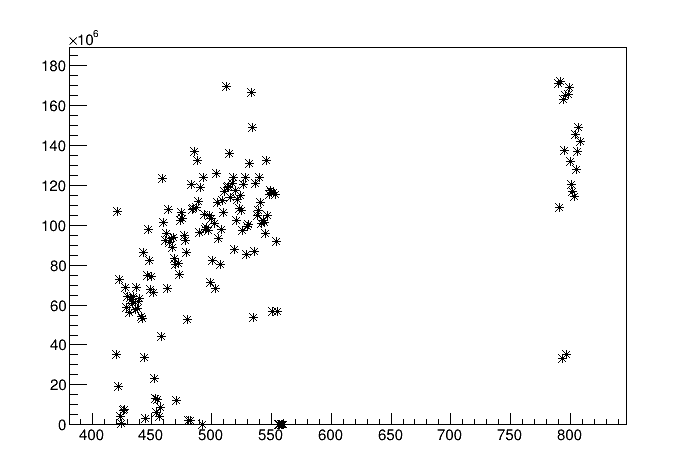

In [8]:
c1->Clear();
gt0S->SetMarkerStyle(3);
gt0S->Draw("ap");
c1->Draw();

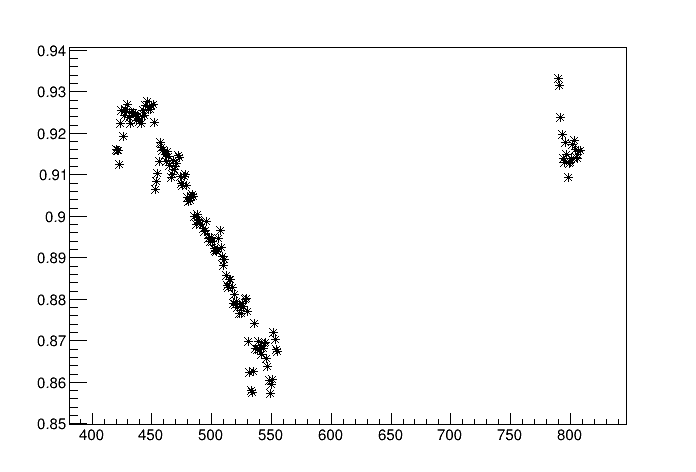

run 420~452 ave t0MB/t0dM = 0.893697
run 799~809 ave t0MB/t0dM = 0.917634


In [9]:
c1->Clear();
gMBtoM->SetMarkerStyle(3);
gMBtoM->Draw("ap");
c1->Draw();
cout<<"run 420~452 ave t0MB/t0dM = "<<t0MBallall1/t0dMallall1<<'\n';
cout<<"run 799~809 ave t0MB/t0dM = "<<t0MBallall2/t0dMallall2<<'\n';

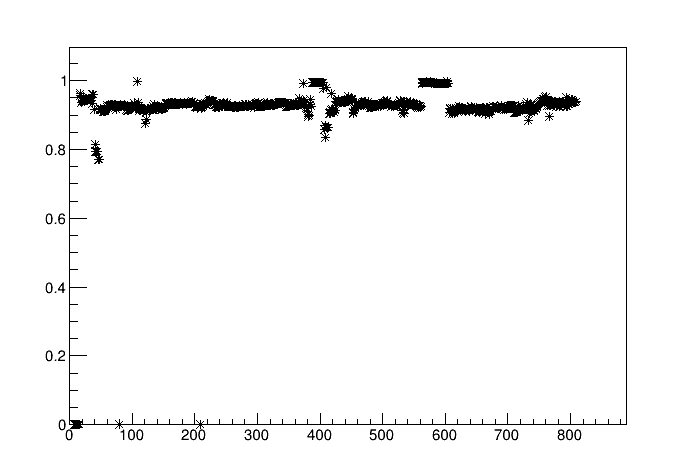

In [10]:
c1->Clear();
gaccpttedrate->SetMarkerStyle(3);
gaccpttedrate->Draw("ap");
c1->Draw();

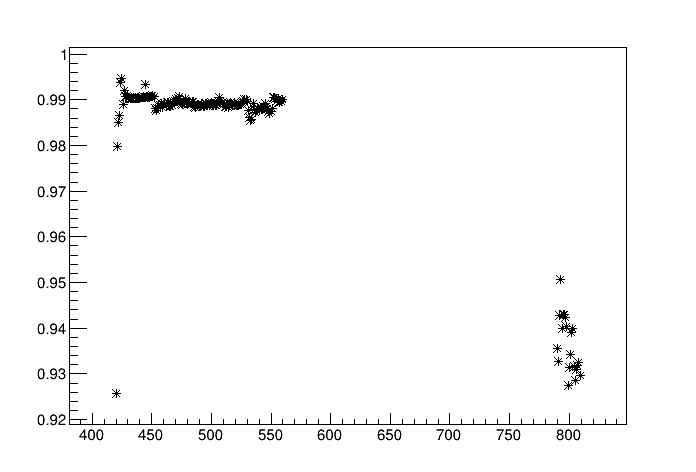

In [11]:
c1->Clear();
gCrate->SetMarkerStyle(3);
gCrate->Draw("ap");
c1->Draw();

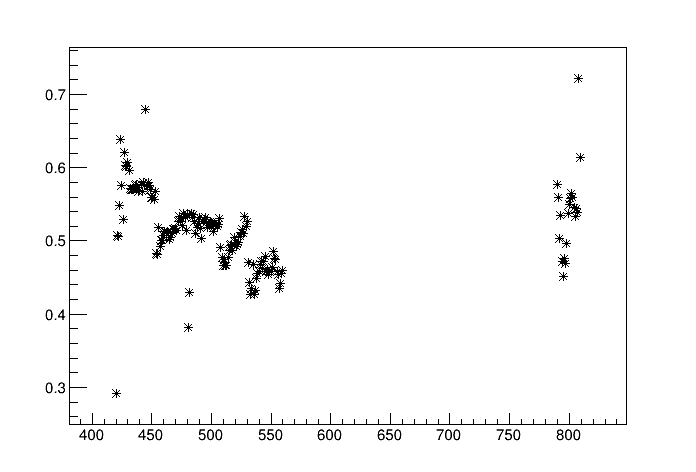

In [12]:
c1->Clear();
gtarrate->SetMarkerStyle(3);
gtarrate->Draw("ap");
c1->Draw();

In [13]:
  TGraph *gt0realall=new TGraph();
Int_t countrealall=0;
long C15CH2all1=0,C15CH2all2=0;
long C15Call1=0,C15Call2=0;
long C15notarall1=0,C15notarall2=0;
  for(Int_t ii=0;ii<810;ii++){
      t0realall[ii]=t0sall[ii]*Crate[ii]*tarrate[ii]*accpttedrate[ii]*(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii]);
      //if((ii>=420&&ii<=560)||(ii>=790&&ii<=808))cout<<ii<<'\t'<<t0realall[ii]<<'\t'<<t0sall[ii]<<'\t'<<Crate[ii]<<'\t'<<tarrate[ii]<<'\t'<<accpttedrate[ii]<<'\t'<<(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii])<<'\n';
      if((ii>=420&&ii<=560)||(ii>=790&&ii<=808))gt0realall->SetPoint(countrealall++,ii,t0realall[ii]);
      if(ii>=420&&ii<=452)C15CH2all1+=t0realall[ii];
      if(ii>=531&&ii<=551)C15Call1+=t0realall[ii];
      if(ii>=552&&ii<=555)C15notarall1+=t0realall[ii];
      if(ii>=790&&ii<=791)C15notarall2+=t0realall[ii];
      if(ii==792||ii==798)C15Call2+=t0realall[ii];
      if(ii>=799&&ii<=808)C15CH2all2+=t0realall[ii];
  }

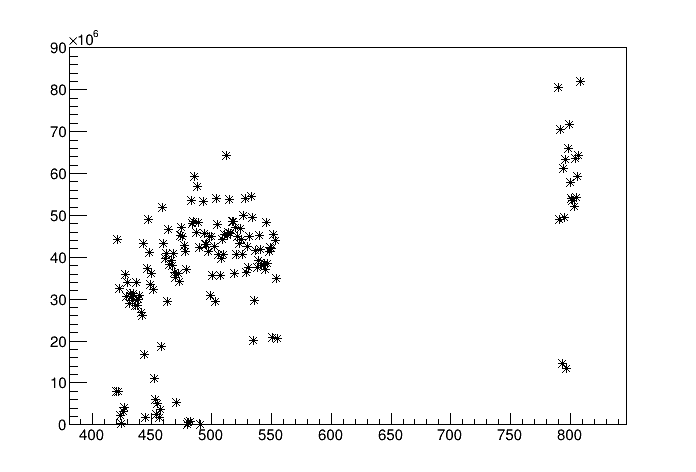

*******CH2**********
862709543
612967235
1475676778
*******C**********
826993039
136410501
1439960274
*******notar**********
145021902
129493812
274515714


In [14]:
c1->Clear();
gt0realall->SetMarkerStyle(3);
gt0realall->Draw("ap");
c1->Draw();
cout<<"*******CH2**********"<<'\n';
cout<<C15CH2all1<<'\n';
cout<<C15CH2all2<<'\n';
cout<<C15CH2all1+C15CH2all2<<'\n';
cout<<"*******C**********"<<'\n';
cout<<C15Call1<<'\n';
cout<<C15Call2<<'\n';
cout<<C15Call1+C15CH2all2<<'\n';
cout<<"*******notar**********"<<'\n';
cout<<C15notarall1<<'\n';
cout<<C15notarall2<<'\n';
cout<<C15notarall1+C15notarall2<<'\n';

In [15]:
/*
        ofstream write1;
        TString outfileName = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/check/txt/15C_CH2_tafandt1.txt");
        write1.open(outfileName.Data(), ios::out);
        for(Int_t i=420; i<=452; i++)write1<< i<< "\t" <<setprecision(10)<<xtafall[i]<<"\t" <<setprecision(10)<<vtafall[i]<<'\t'<<setprecision(10)<<t1d1all[i]<<endl;
        for(Int_t i=799; i<=809; i++)write1<< i<< "\t" <<setprecision(10)<<xtafall[i]<<"\t" <<setprecision(10)<<vtafall[i]<<'\t'<<setprecision(10)<<t1d1all[i]<<endl;
        write1.close();
*/